In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
for column in train.columns:
    print(column,' : ',train[column].dtype)

PassengerId  :  int64
Survived  :  int64
Pclass  :  int64
Name  :  object
Sex  :  object
Age  :  float64
SibSp  :  int64
Parch  :  int64
Ticket  :  object
Fare  :  float64
Cabin  :  object
Embarked  :  object


In [ ]:
# Converting some columns into categorical data
train["Survived"] = train["Survived"].astype('category')
train["Pclass"] = train["Pclass"].astype('category')
test["Pclass"] = test["Pclass"].astype('category')

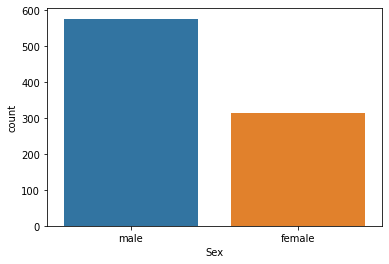

In [ ]:
sns.countplot(x='Sex', data=train);

* More number of males on the ship

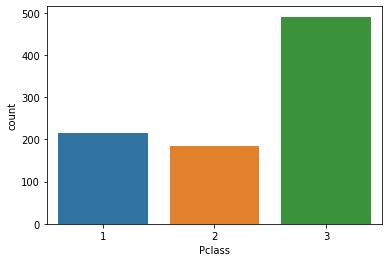

In [ ]:
sns.countplot(x='Pclass', data=train);

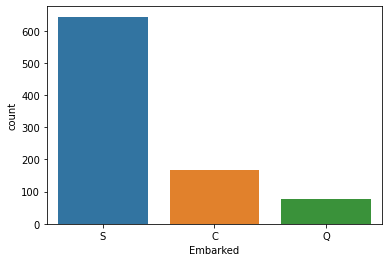

In [ ]:
sns.countplot(x='Embarked', data=train);

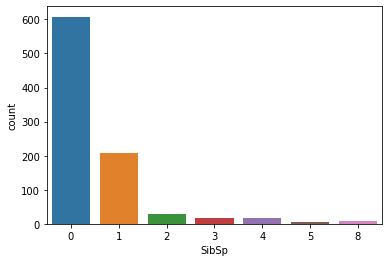

In [ ]:
sns.countplot(x='SibSp', data=train);

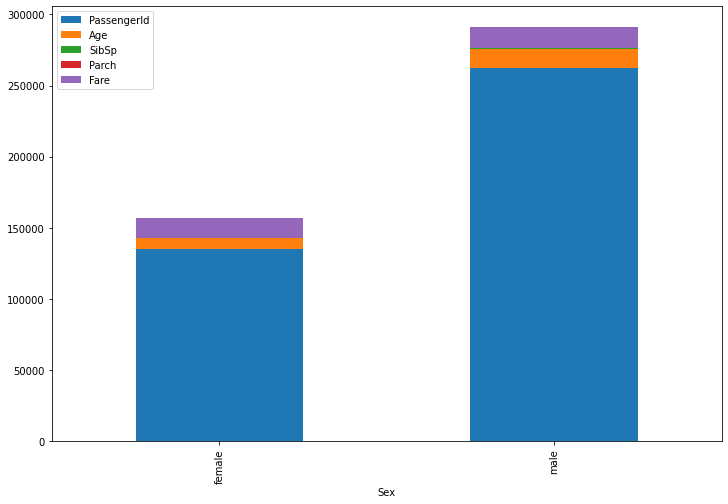

In [ ]:
train.groupby('Sex').agg('sum').plot(kind='bar', figsize=(12,8),stacked=True);

In [ ]:
train['Died'] = 1 - pd.to_numeric(train['Survived'])

In [ ]:
train['Survived'] = train['Survived'].astype('int64')

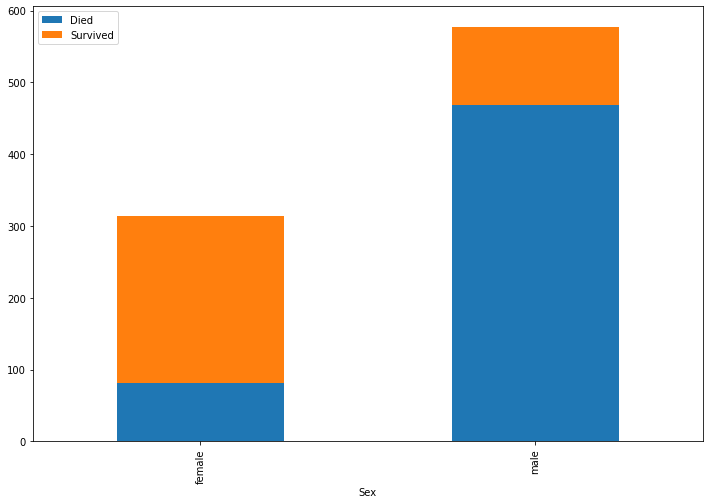

In [ ]:
train.groupby('Sex').agg('sum')[['Died','Survived']].plot(kind='bar', figsize=(12,8),stacked=True);

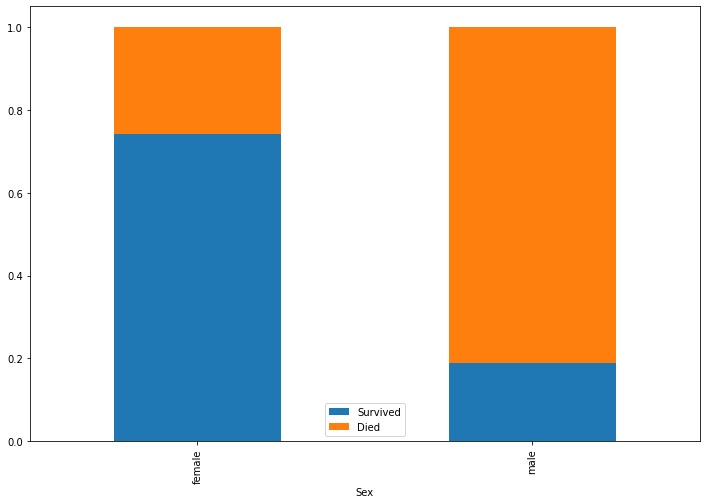

In [ ]:
train.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(12,8),stacked=True);

* Seems like you were more likely to surivive if you were a woman

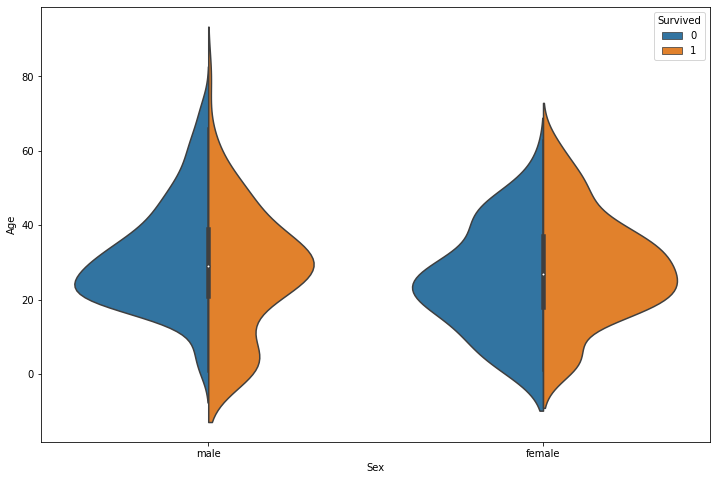

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Sex', y='Age',hue='Survived', data=train, split=True);

* Men who are between 20 to 40 are survived more compared to older aged men.
* It is somewhat same for women but women but the violinpolt has a gradual decrease.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


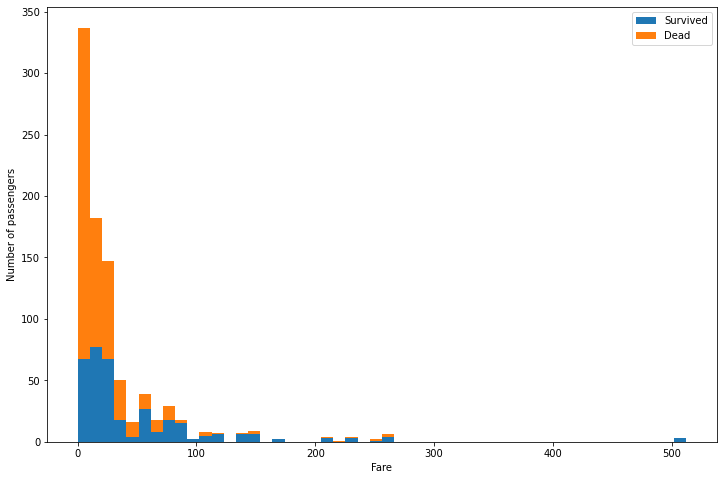

In [ ]:
figure = plt.figure(figsize=(12, 8))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

* Passengers with cheaper ticket fares are more likely to be dead.
* If you had more expensive ticket then you were more likely to survive.

In [ ]:
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
train['Single'] = train['FamilySize'].map(lambda s: 1 if s==1 else 0)
train['SmallFamily'] = train['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
train['BigFamily'] = train['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

* Large families are usually grouped and support together and are often with women and children, hence they are more likely to get rescued than those were travelling alone.

In [ ]:
titles = set()
for name in train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Don', 'Mme', 'Miss', 'Lady', 'Sir', 'Dr', 'Col', 'the Countess', 'Mrs', 'Major', 'Capt', 'Jonkheer', 'Ms', 'Mlle', 'Master', 'Rev', 'Mr'}


In [ ]:
title_dict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty","Mme": "Mrs","Mlle": "Miss","Ms": "Mrs","Mr" : "Mr","Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [ ]:
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train['Title'] = train.Title.map(title_dict)
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,FamilySize,Single,SmallFamily,BigFamily,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1,1,1,0,0,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,1,1,0,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1,4,0,1,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,1,1,0,0,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1,1,1,0,0,Mr


In [ ]:
df=train.drop(['Name','Ticket','Cabin','PassengerId','Died', 'Survived'], axis=1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Single,SmallFamily,BigFamily,Title
0,3,male,22.0,1,0,7.2500,S,2,0,1,0,Mr
1,1,female,38.0,1,0,71.2833,C,2,0,1,0,Mrs
2,3,female,26.0,0,0,7.9250,S,1,1,0,0,Miss
3,1,female,35.0,1,0,53.1000,S,2,0,1,0,Mrs
4,3,male,35.0,0,0,8.0500,S,1,1,0,0,Mr


In [ ]:
df['Embarked'].fillna(value='S',inplace=True)

In [ ]:
median_men=df[df['Sex']=='male']['Age'].median()
median_women=df[df['Sex']=='female']['Age'].median()

In [ ]:
df.loc[(df.Age.isnull()) & (df['Sex']=='female'),'Age']=median_women
df.loc[(df.Age.isnull()) & (df['Sex']=='male'),'Age']=median_men

In [ ]:
df.isna().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
Single         0
SmallFamily    0
BigFamily      0
Title          0
dtype: int64

In [ ]:
df.replace({'Sex' : { 'female' : 0, 'male' : 1}}, inplace=True)
df.replace({'Embarked' : {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
df.replace({'Title' :{'Mr' : 0,'Miss' : 1,'Mrs' : 2,'Master' : 3,'Officer' : 4,'Royalty' : 5}}, inplace = True)

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Single,SmallFamily,BigFamily,Title
0,3,1,22.0,1,0,7.2500,0,2,0,1,0,0
1,1,0,38.0,1,0,71.2833,1,2,0,1,0,2
2,3,0,26.0,0,0,7.9250,0,1,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,2,0,1,0,2
4,3,1,35.0,0,0,8.0500,0,1,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df1 = st.fit_transform(df)
scaled_data = pd.DataFrame(df1, columns=df.columns)

In [ ]:
scaled_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Single,SmallFamily,BigFamily,Title
0,0.827377,0.737695,-0.571902,0.432793,-0.473674,-0.502445,-0.568837,0.059160,-1.231645,1.432260,-0.273476,-0.699709
1,-1.566107,-1.355574,0.657785,0.432793,-0.473674,0.786845,1.005181,0.059160,-1.231645,1.432260,-0.273476,1.203927
2,0.827377,-1.355574,-0.264480,-0.474545,-0.473674,-0.488854,-0.568837,-0.560975,0.811922,-0.698197,-0.273476,0.252109
3,-1.566107,-1.355574,0.427219,0.432793,-0.473674,0.420730,-0.568837,0.059160,-1.231645,1.432260,-0.273476,1.203927
4,0.827377,0.737695,0.427219,-0.474545,-0.473674,-0.486337,-0.568837,-0.560975,0.811922,-0.698197,-0.273476,-0.699709
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.187625,-0.474545,-0.473674,-0.386671,-0.568837,-0.560975,0.811922,-0.698197,-0.273476,3.107562
887,-1.566107,-1.355574,-0.802468,-0.474545,-0.473674,-0.044381,-0.568837,-0.560975,0.811922,-0.698197,-0.273476,0.252109
888,0.827377,-1.355574,-0.187625,0.432793,2.008933,-0.176263,-0.568837,1.299429,-1.231645,1.432260,-0.273476,0.252109
889,-1.566107,0.737695,-0.264480,-0.474545,-0.473674,-0.044381,1.005181,-0.560975,0.811922,-0.698197,-0.273476,-0.699709


In [ ]:
from sklearn.model_selection import train_test_split
x = scaled_data
y = train['Survived']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import  cross_val_score

dec_tree = DecisionTreeClassifier()
random = RandomForestClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

In [ ]:
estimators = np.linspace(start = 200, stop = 1000, num = 5)
n_estimators = []
for i in estimators:
  n_estimators.append(int(i))
n_estimators

[200, 400, 600, 800, 1000]

In [ ]:
dec_tree_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

random_grid = { 
                'n_estimators': n_estimators,
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                'criterion' :['gini', 'entropy']
               }

ada_grid = {
                'n_estimators': np.arange(10,300,10),
                'learning_rate': [0.01, 0.05, 0.1, 1]
            }

xgb_grid = {
                'min_child_weight': [1, 5, 10],
                'gamma': [0.5, 1, 1.5, 2, 5],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'max_depth': [3, 4, 5]
            }

In [ ]:
from sklearn.model_selection import GridSearchCV

dec_tree_cv = GridSearchCV(estimator = dec_tree,param_grid  = dec_tree_grid, cv=5, verbose = 1, n_jobs=-1)
random_cv = GridSearchCV(estimator = random,param_grid = random_grid, cv=5, verbose = 1,  n_jobs=2)
ada_cv= GridSearchCV(estimator = ada,param_grid  = ada_grid, cv=5, verbose = 1,  n_jobs=-1)
xgb_cv = GridSearchCV(estimator = xgb,param_grid  = xgb_grid, cv=5, verbose = 1,  n_jobs=-1)

In [ ]:
dec_tree_cv.fit(x, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
random_cv.fit(x,y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   35.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.2min
[Parallel(n_jobs=2)]: Done 750 out of 750 | elapsed: 10.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
ada_cv.fit(x, y)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 580 out of 580 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
xgb_cv.fit(x, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 1578 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_we

In [ ]:
print(dec_tree_cv.best_params_)
print(random_cv.best_params_)
print(ada_cv.best_params_)
print(xgb_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 4}
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 400}
{'learning_rate': 1, 'n_estimators': 40}
{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}


In [ ]:
dec_predict = dec_tree_cv.predict(xtest)
random_predict = random_cv.predict(xtest)
ada_predict = ada_cv.predict(xtest)
xgb_predict = xgb_cv.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dec_acc = accuracy_score(ytest, dec_predict)
random_acc = accuracy_score(ytest, random_predict)
ada_acc = accuracy_score(ytest, ada_predict)
xgb_acc = accuracy_score(ytest, xgb_predict)

print(f'The accuracy of the Decision tree classifer is : {dec_acc}')
print(f'The accuracy of the Random Forest classifer is : {random_acc}')
print(f'The accuracy of the AdaBoost classifer is : {ada_acc}')
print(f'The accuracy of the XGboost classifer is : {xgb_acc}')

The accuracy of the Decision tree classifer is : 0.8212290502793296
The accuracy of the Random Forest classifer is : 0.8659217877094972
The accuracy of the AdaBoost classifer is : 0.8435754189944135
The accuracy of the XGboost classifer is : 0.9441340782122905


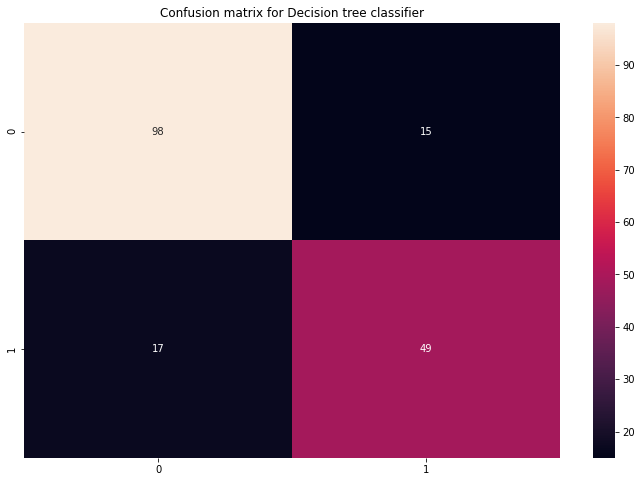

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(ytest, dec_predict),annot=True, fmt='g')
plt.title("Confusion matrix for Decision tree classifier");

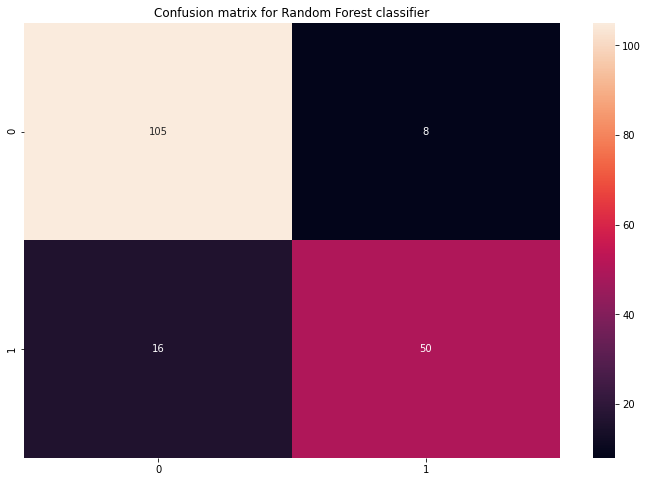

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(ytest, random_predict),annot=True, fmt='g')
plt.title("Confusion matrix for Random Forest classifier");

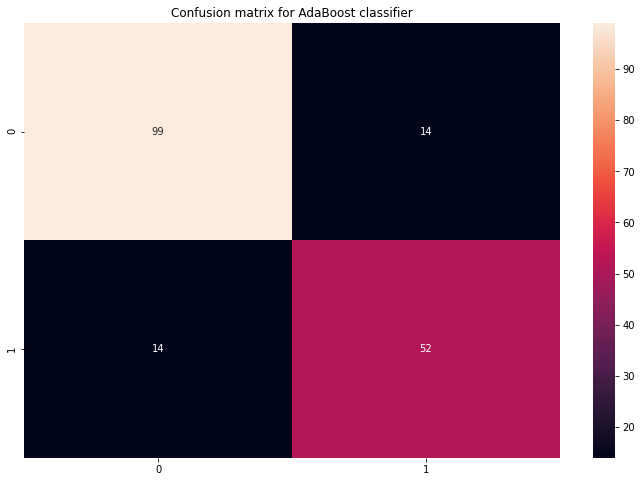

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(ytest, ada_predict),annot=True, fmt='g')
plt.title("Confusion matrix for AdaBoost classifier");

Text(0.5, 1.0, 'Confusion matrix for XGboost classifier')

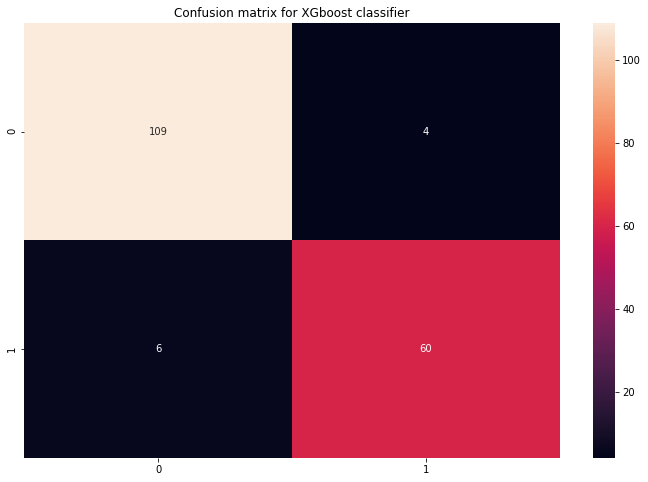

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(ytest, xgb_predict),annot=True, fmt='g')
plt.title("Confusion matrix for XGboost classifier")

* The Xgboost as expected performed the best on the training data. Now let's use it on the test data.

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,SmallFamily,BigFamily
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2.0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2.0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0,0,1,0


In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            1
FamilySize       0
Single           0
SmallFamily      0
BigFamily        0
dtype: int64

In [ ]:
fare_median = train['Fare'].median()

In [ ]:
test.loc[(test.Fare.isnull()), 'Fare'] = fare_median

In [ ]:
test.loc[(test.Age.isnull()) & (test['Sex']=='female'),'Age']=median_women
test.loc[(test.Age.isnull()) & (test['Sex']=='male'),'Age']=median_men

In [ ]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
test['FamilySize'] = test['Parch'] + train['SibSp'] + 1
test['Single'] = test['FamilySize'].map(lambda s: 1 if s==1 else 0)
test['SmallFamily'] = test['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
test['BigFamily'] = test['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [ ]:
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test.Title.map(title_dict)
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,SmallFamily,BigFamily,Title
413,1305,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S,1.0,1,0,0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1.0,1,0,0,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0,1,0,0,Mr
416,1308,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,NaN,S,2.0,0,1,0,Mr
417,1309,3,"Peter, Master. Michael J",male,29.0,1,1,2668,22.3583,NaN,C,2.0,0,1,0,Master


In [ ]:
df2=test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [ ]:
df2.replace({'Sex' : { 'female' : 0, 'male' : 1}}, inplace=True)
df2.replace({'Embarked' : {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
df2.replace({'Title' :{'Mr' : 0,'Miss' : 1,'Mrs' : 2,'Master' : 3,'Officer' : 4,'Royalty' : 5}}, inplace = True)

In [ ]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Single,SmallFamily,BigFamily,Title
0,3,1,34.5,0,0,7.8292,2,2.0,0,1,0,0.0
1,3,0,47.0,1,0,7.0000,0,2.0,0,1,0,2.0
2,2,1,62.0,0,0,9.6875,2,1.0,1,0,0,0.0
3,3,1,27.0,0,0,8.6625,0,2.0,0,1,0,0.0
4,3,0,22.0,1,1,12.2875,0,2.0,0,1,0,2.0


In [ ]:
scaled_test_array = st.transform(df2)

In [ ]:
scaled_test = pd.DataFrame(data = scaled_test_array, columns=df2.columns)
scaled_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Single,SmallFamily,BigFamily,Title
0,0.827377,0.737695,0.388791,-0.474545,-0.473674,-0.490783,2.579199,0.059160,-1.231645,1.432260,-0.273476,-0.699709
1,0.827377,-1.355574,1.349484,0.432793,-0.473674,-0.507479,-0.568837,0.059160,-1.231645,1.432260,-0.273476,1.203927
2,-0.369365,0.737695,2.502316,-0.474545,-0.473674,-0.453367,2.579199,-0.560975,0.811922,-0.698197,-0.273476,-0.699709
3,0.827377,0.737695,-0.187625,-0.474545,-0.473674,-0.474005,-0.568837,0.059160,-1.231645,1.432260,-0.273476,-0.699709
4,0.827377,-1.355574,-0.571902,0.432793,0.767630,-0.401017,-0.568837,0.059160,-1.231645,1.432260,-0.273476,1.203927
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,0.737695,-0.033914,-0.474545,-0.473674,-0.486337,-0.568837,-0.560975,0.811922,-0.698197,-0.273476,-0.699709
414,-1.566107,-1.355574,0.734641,-0.474545,-0.473674,1.544246,1.005181,-0.560975,0.811922,-0.698197,-0.273476,NaN
415,0.827377,0.737695,0.696213,-0.474545,-0.473674,-0.502445,-0.568837,-0.560975,0.811922,-0.698197,-0.273476,-0.699709
416,0.827377,0.737695,-0.033914,-0.474545,-0.473674,-0.486337,-0.568837,0.059160,-1.231645,1.432260,-0.273476,-0.699709


In [ ]:
test_preds = xgb_cv.predict(scaled_test)
test_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived' : test_preds})
submission.to_csv('submission.csv', index = False )